In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = 500
pd.set_option('precision', 10)
pd.set_option('display.float_format', '{:.3f}'.format)

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
train = pd.read_csv("course_project_train.csv")
test = pd.read_csv("course_project_test.csv")
df = pd.concat([train,test],ignore_index=True, sort=False)

# Common data observation

In [3]:
print(f'Train Shape - {train.shape}',f'Test Shape - {test.shape}',f'DF shape - {df.shape}', sep="\n") 

Train Shape - (7500, 17)
Test Shape - (2500, 16)
DF shape - (10000, 17)


In [4]:
train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.000,NaN,0.000,11.000,26.300,685960.000,1.000,nan,1.000,debt consolidation,Short Term,99999999.000,47386.000,7914.000,749.000,0
1,Own Home,1025487.000,10+ years,0.000,15.000,15.300,1181730.000,0.000,nan,0.000,debt consolidation,Long Term,264968.000,394972.000,18373.000,737.000,1
2,Home Mortgage,751412.000,8 years,0.000,11.000,35.000,1182434.000,0.000,nan,0.000,debt consolidation,Short Term,99999999.000,308389.000,13651.000,742.000,0
3,Own Home,805068.000,6 years,0.000,8.000,22.500,147400.000,1.000,nan,1.000,debt consolidation,Short Term,121396.000,95855.000,11338.000,694.000,0
4,Rent,776264.000,8 years,0.000,13.000,13.600,385836.000,1.000,nan,0.000,debt consolidation,Short Term,125840.000,93309.000,7180.000,719.000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
Home Ownership                  10000 non-null object
Annual Income                   7930 non-null float64
Years in current job            9543 non-null object
Tax Liens                       10000 non-null float64
Number of Open Accounts         10000 non-null float64
Years of Credit History         10000 non-null float64
Maximum Open Credit             10000 non-null float64
Number of Credit Problems       10000 non-null float64
Months since last delinquent    4561 non-null float64
Bankruptcies                    9983 non-null float64
Purpose                         10000 non-null object
Term                            10000 non-null object
Current Loan Amount             10000 non-null float64
Current Credit Balance          10000 non-null float64
Monthly Debt                    10000 non-null float64
Credit Score                    7930 non-null float64
Credit Default       

# Outliers

In [6]:
# tranform to categogy finding
def col_info(data):
    temp = pd.DataFrame(columns = ['name', 'values', 'nancounts','type'])
    for colname in data.columns:
        temp = temp.append({'name': colname, 
                           'values': len(data[colname].value_counts()),
                           'nancounts': sum(data[colname].isnull()),
                           'type': data[colname].dtype}, ignore_index=True)

    return temp
                            


In [7]:
col_info(df)

,name,values,nancounts,type
0,Home Ownership,4,0,object
1,Annual Income,7107,2070,float64
2,Years in current job,11,457,object
3,Tax Liens,9,0,float64
4,Number of Open Accounts,42,0,float64
5,Years of Credit History,423,0,float64
6,Maximum Open Credit,9096,0,float64
7,Number of Credit Problems,9,0,float64
8,Months since last delinquent,89,5439,float64
9,Bankruptcies,6,17,float64


In [8]:
#df = df.drop('Months since last delinquent',axis = 'columns')


In [9]:
col_to_cat = [
    'Home Ownership',
    'Years in current job',
    'Tax Liens',
    'Number of Open Accounts',
    'Number of Credit Problems',
    'Bankruptcies',
    'Purpose',
             ]

df[col_to_cat] = df[col_to_cat].astype('category')

In [10]:
df['Term'] = pd.factorize(df['Term'])[0]
df['Term'] = df['Term'].astype('category')

In [11]:
df['Years in current job'] = df['Years in current job'].fillna(df['Years in current job'].mode()[0])
df['Bankruptcies'] = df['Bankruptcies'].fillna(df['Bankruptcies'].mode()[0])
df['Months since last delinquent'] = df['Months since last delinquent'].fillna(0)

In [12]:
col_info(df)

,name,values,nancounts,type
0,Home Ownership,4,0,category
1,Annual Income,7107,2070,float64
2,Years in current job,11,0,category
3,Tax Liens,9,0,category
4,Number of Open Accounts,42,0,category
5,Years of Credit History,423,0,float64
6,Maximum Open Credit,9096,0,float64
7,Number of Credit Problems,9,0,category
8,Months since last delinquent,89,0,float64
9,Bankruptcies,6,0,category


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,7930.000,1366524.510,863827.629,106533.000,845989.250,1168813.500,1638693.000,14975610.000
Years of Credit History,10000.000,18.320,7.095,3.900,13.500,17.000,22.000,57.700
Maximum Open Credit,10000.000,886507.897,13899818.885,0.000,278811.500,478181.000,794359.500,1304726170.000
Months since last delinquent,10000.000,15.765,22.640,0.000,0.000,0.000,29.000,118.000
Current Loan Amount,10000.000,11943812.992,32008780.390,11242.000,180548.500,311718.000,521070.000,99999999.000
Current Credit Balance,10000.000,291474.089,333997.864,0.000,113225.750,209019.000,361950.000,6506797.000
Monthly Debt,10000.000,18303.676,11831.648,0.000,10059.750,16200.000,23888.250,136679.000
Credit Score,7930.000,1171.992,1639.813,585.000,711.000,731.000,743.000,7510.000
Credit Default,7500.000,0.282,0.450,0.000,0.000,0.000,1.000,1.000


In [14]:
df[df['Maximum Open Credit'] >10_000_000 ].describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,21.000,2573233.333,1346903.971,1236292.000,1475198.000,2226230.000,3312365.000,6029954.000
Years of Credit History,24.000,22.787,6.429,12.300,17.725,21.250,25.850,35.500
Maximum Open Credit,24.000,100365707.750,271001732.715,10201598.000,13598161.500,19232906.000,30036220.500,1304726170.000
Months since last delinquent,24.000,11.000,18.817,0.000,0.000,0.000,21.750,59.000
Current Loan Amount,24.000,29472545.208,46230706.261,33110.000,249606.500,705177.000,99999999.000,99999999.000
Current Credit Balance,24.000,2308763.625,1681740.333,656450.000,1072303.000,1941781.000,2526211.500,6506797.000
Monthly Debt,24.000,33686.250,29427.769,5492.000,15923.000,26952.500,39453.750,136679.000
Credit Score,21.000,736.095,17.570,695.000,729.000,743.000,749.000,751.000
Credit Default,19.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [15]:
df.loc[df['Maximum Open Credit'] >10_000_000,'Maximum Open Credit' ] = np.nan

In [16]:
df[df['Current Loan Amount'] >800_000 ].describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,1167.000,1408450.674,859041.228,106533.000,872366.000,1239826.000,1720260.000,8758449.000
Years of Credit History,1167.000,18.377,6.937,4.800,13.700,17.000,21.750,50.900
Maximum Open Credit,1160.000,684047.916,704975.449,0.000,296736.000,518199.000,846939.500,9516540.000
Months since last delinquent,1167.000,14.873,22.053,0.000,0.000,0.000,26.000,81.000
Current Loan Amount,1167.000,99999999.000,0.000,99999999.000,99999999.000,99999999.000,99999999.000,99999999.000
Current Credit Balance,1167.000,302688.886,369630.375,0.000,111948.000,213940.000,367232.000,4304051.000
Monthly Debt,1167.000,18039.287,12070.164,0.000,9494.500,15640.000,23977.500,94674.000
Credit Score,1167.000,729.736,22.203,587.000,726.000,737.000,744.000,751.000
Credit Default,870.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [17]:
df.loc[df['Current Loan Amount'] >800_000 ,'Current Loan Amount' ] = np.nan

In [18]:
col_info(df)

,name,values,nancounts,type
0,Home Ownership,4,0,category
1,Annual Income,7107,2070,float64
2,Years in current job,11,0,category
3,Tax Liens,9,0,category
4,Number of Open Accounts,42,0,category
5,Years of Credit History,423,0,float64
6,Maximum Open Credit,9072,24,float64
7,Number of Credit Problems,9,0,category
8,Months since last delinquent,89,0,float64
9,Bankruptcies,6,0,category


In [19]:
# df.loc[df['Credit Score']> 800,'Credit Score' ] = df.loc[df['Credit Score']> 800,'Credit Score' ] /10


In [20]:
df['ID'] = df.index.tolist()

In [21]:
for cat_colname in df.select_dtypes(include='category').columns:
    df[cat_colname] = pd.factorize(df[cat_colname])[0]
    df[cat_colname] = df[cat_colname].astype('category')

In [22]:
df = df[[df.columns[-1]] + df.columns[:-1].tolist()]

In [23]:
col_info(df)

,name,values,nancounts,type
0,ID,10000,0,int64
1,Home Ownership,4,0,category
2,Annual Income,7107,2070,float64
3,Years in current job,11,0,category
4,Tax Liens,9,0,category
5,Number of Open Accounts,42,0,category
6,Years of Credit History,423,0,float64
7,Maximum Open Credit,9072,24,float64
8,Number of Credit Problems,9,0,category
9,Months since last delinquent,89,0,float64


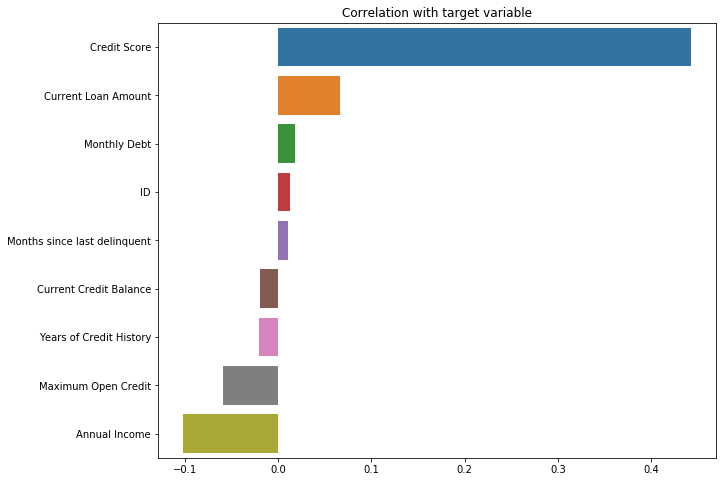

In [24]:
corr_with_target = df.corr().iloc[:-1, -1].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Correlation with target variable');

# Nan Filling

In [25]:
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].mean())
df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].mean())
df['Current Loan Amount'] = df['Current Loan Amount'].fillna(df['Current Loan Amount'].mean())
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].mode()[0])

In [26]:
col_info(df)

,name,values,nancounts,type
0,ID,10000,0,int64
1,Home Ownership,4,0,category
2,Annual Income,7108,0,float64
3,Years in current job,11,0,category
4,Tax Liens,9,0,category
5,Number of Open Accounts,42,0,category
6,Years of Credit History,423,0,float64
7,Maximum Open Credit,9073,0,float64
8,Number of Credit Problems,9,0,category
9,Months since last delinquent,89,0,float64


In [27]:
"""
t = "Credit Score"
for i in ["Annual Income","Maximum Open Credit","Current Loan Amount","Monthly Debt"]:
    temp = test.groupby([t], as_index= False).agg({ i: ["mean"] })
    name = f'Score_{ i.split()[-1]}'
    temp.columns = [t, name]
    df = df.merge(temp, on = [t], how = "left")
    df[name] = df[name].fillna(df[name].mean())
    df = df[[df.columns[0]] + [df.columns[-1]] + df.columns[1:-1].tolist()]
"""

'\nt = "Credit Score"\nfor i in ["Annual Income","Maximum Open Credit","Current Loan Amount","Monthly Debt"]:\n    temp = test.groupby([t], as_index= False).agg({ i: ["mean"] })\n    name = f\'Score_{ i.split()[-1]}\'\n    temp.columns = [t, name]\n    df = df.merge(temp, on = [t], how = "left")\n    df[name] = df[name].fillna(df[name].mean())\n    df = df[[df.columns[0]] + [df.columns[-1]] + df.columns[1:-1].tolist()]\n'

In [28]:
df


,ID,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,0,482087.000,0,0,0,26.300,685960.000,0,0.000,0,0,0,309988.802,47386.000,7914.000,749.000,0.000
1,1,0,1025487.000,0,0,1,15.300,1181730.000,1,0.000,1,0,1,264968.000,394972.000,18373.000,737.000,1.000
2,2,1,751412.000,1,0,0,35.000,1182434.000,1,0.000,1,0,0,309988.802,308389.000,13651.000,742.000,0.000
3,3,0,805068.000,2,0,2,22.500,147400.000,0,0.000,0,0,0,121396.000,95855.000,11338.000,694.000,0.000
4,4,2,776264.000,1,0,3,13.600,385836.000,0,0.000,1,0,0,125840.000,93309.000,7180.000,719.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1,1020053.000,0,0,10,29.100,559152.000,0,68.000,0,0,0,309988.802,162735.000,15046.000,745.000,nan
9996,9996,1,1366524.510,9,0,1,17.000,1737780.000,1,77.000,1,0,0,468512.000,1439269.000,32996.000,740.000,nan
9997,9997,1,1171806.000,9,0,41,12.800,1706430.000,1,0.000,1,0,0,430496.000,676438.000,36912.000,695.000,nan
9998,9998,2,723520.000,0,0,10,28.800,945780.000,1,0.000,1,0,0,257774.000,391248.000,13506.000,744.000,nan


# Learning preparing

In [29]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [30]:
TARGET_NAME = 'Credit Default'
NUM_FEATURE_NAMES = ['Annual Income', 'Years of Credit History', 'Maximum Open Credit',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score','Months since last delinquent']

CAT_FEATURE_NAMES = ['Home Ownership', 'Years in current job', 'Number of Open Accounts',
       'Bankruptcies', 'Purpose', 'Term',]
SELECTED_FEATURE_NAMES = NUM_FEATURE_NAMES + CAT_FEATURE_NAMES

In [31]:
scaler = StandardScaler()

df_norm = df.copy()
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])

df = df_norm.copy()

In [32]:
train_df = df[:7500].copy()
test_df = df[7500:].copy()

In [33]:
X = train_df[SELECTED_FEATURE_NAMES]
y = train_df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=21)

In [34]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_for_balancing[TARGET_NAME].value_counts()

0.000    4046
1.000    1579
Name: Credit Default, dtype: int64

In [35]:
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
df_balanced[TARGET_NAME].value_counts()

0.000    4046
1.000    3158
Name: Credit Default, dtype: int64

In [36]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

In [37]:
X_train

,Annual Income,Years of Credit History,Maximum Open Credit,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Months since last delinquent,Home Ownership,Years in current job,Number of Open Accounts,Bankruptcies,Purpose,Term
5054,0.000,-0.581,2.788,0.938,4.423,1.914,-0.233,-0.696,1,9,15,1,0,0
1859,-0.664,-0.186,-0.183,0.251,-0.020,0.297,-0.258,1.336,2,6,9,1,0,0
5095,0.946,-0.045,1.638,2.775,1.298,1.447,4.214,1.026,2,7,6,1,0,1
3494,-0.778,-0.256,-0.445,-1.290,-0.356,0.514,-0.273,2.307,2,0,2,0,0,0
1136,0.000,-1.257,-0.302,0.144,-0.083,0.623,-0.233,-0.431,2,8,12,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6338,-1.482,-0.383,-0.708,-1.426,-0.752,-1.162,-0.252,2.793,2,0,14,1,4,0
2848,0.000,0.801,0.928,1.532,1.297,-0.162,-0.233,-0.696,0,0,5,1,0,1
4451,1.578,-0.369,-0.425,1.290,-0.277,3.088,-0.229,2.307,1,7,26,0,0,0
6610,1.130,1.872,0.470,2.597,0.290,1.256,4.044,-0.696,1,0,6,0,0,0


# Learning

## Catboost

In [38]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [39]:
from catboost import Pool, CatBoost,CatBoostClassifier

cat_feats = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(include='category').columns]

train_pool = Pool(X_train.values,y_train.values,cat_features = cat_feats )
test_pool = Pool(X_test.values, cat_features = cat_feats) 



model = CatBoostClassifier(
                    random_state=21,
                    silent=True)
model.fit(train_pool)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(f1_score(y_train, y_train_pred ))
print(f1_score(y_test, y_test_pred))
print()

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

0.8845710521982546
0.5112016293279023

TRAIN

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92      4046
         1.0       0.92      0.85      0.88      3158

   micro avg       0.90      0.90      0.90      7204
   macro avg       0.91      0.90      0.90      7204
weighted avg       0.90      0.90      0.90      7204

TEST

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.83      1341
         1.0       0.56      0.47      0.51       534

   micro avg       0.74      0.74      0.74      1875
   macro avg       0.68      0.66      0.67      1875
weighted avg       0.73      0.74      0.74      1875

CONFUSION MATRIX

col_0           0.000  1.000
Credit Default              
0.000            1144    197
1.000             283    251


## LightGMB

In [40]:
import lightgbm as lgbm

In [41]:
model_lgbm = lgbm.LGBMClassifier(random_state=21)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      4046
         1.0       0.96      0.90      0.93      3158

   micro avg       0.94      0.94      0.94      7204
   macro avg       0.94      0.93      0.94      7204
weighted avg       0.94      0.94      0.94      7204

TEST

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82      1341
         1.0       0.54      0.45      0.49       534

   micro avg       0.73      0.73      0.73      1875
   macro avg       0.67      0.65      0.66      1875
weighted avg       0.72      0.73      0.73      1875

CONFUSION MATRIX

col_0           0.000  1.000
Credit Default              
0.000            1139    202
1.000             295    239


## XGBoost

In [42]:
import xgboost as xgb

In [43]:
def XG_cat (X,y):

    for cat_colname in X.select_dtypes(include='category').columns:
            X = pd.concat([X, pd.get_dummies(X[cat_colname], prefix=cat_colname).
                            astype('int64')],axis=1)
            X = X.drop(cat_colname,axis = 'columns')
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=21)
    df_for_balancing = pd.concat([X_train, y_train], axis=1)
    df_for_balancing[TARGET_NAME].value_counts()
    df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    df_balanced[TARGET_NAME].value_counts()
    X_train = df_balanced.drop(columns=TARGET_NAME)
    y_train = df_balanced[TARGET_NAME]
    return X_train, y_train, X_test, y_test

In [44]:
X_trainXG, y_trainXG, X_testXG, y_testXG = XG_cat (X,y)

In [45]:
model_xgb = xgb.XGBClassifier(random_state=21)
model_xgb.fit(X_trainXG, y_trainXG)

y_train_pred = model_xgb.predict(X_trainXG)
y_test_pred = model_xgb.predict(X_testXG)

get_classification_report(y_trainXG, y_train_pred, y_testXG, y_test_pred)

TRAIN

              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79      4046
         1.0       0.79      0.57      0.66      3158

   micro avg       0.74      0.74      0.74      7204
   macro avg       0.75      0.72      0.73      7204
weighted avg       0.75      0.74      0.73      7204

TEST

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      1341
         1.0       0.55      0.48      0.51       534

   micro avg       0.74      0.74      0.74      1875
   macro avg       0.68      0.66      0.67      1875
weighted avg       0.73      0.74      0.73      1875

CONFUSION MATRIX

col_0           0.000  1.000
Credit Default              
0.000            1131    210
1.000             277    257


# Best Param LiteGB

In [46]:
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV

In [47]:
model = lgbm.LGBMClassifier( silent=True,
                                  random_state=21,
                                  n_estimators=  480,)

# CatBoostClassifier(class_weights=[1, 2], silent=True, random_state=21 ,cat_features = cat_feats)

In [48]:
params = {'n_estimators': list(range(300,1000,20)),
          'max_depth': list(range(7,30,2)),'learning_rate' : np.arange(0.01,1,0.01)}

In [49]:
cv = KFold(n_splits=4, random_state=21, shuffle=True)

In [50]:
rs = RandomizedSearchCV(model, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=21, shuffle=True),
          error_score='raise-deprecating',
          estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=480, n_jobs=-1, num_leaves=31, objective=None,
        random_state=21, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980], 'max_depth': [7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], 'learning_rate': array([0.01, 0.02, ..., 0.98, 0.99])},
          pre_dispatch='2*n_jobs', rando

In [51]:
rs.best_score_

0.8479281729393411

In [52]:
rs.best_params_

{'n_estimators': 620, 'max_depth': 23, 'learning_rate': 0.21000000000000002}

In [53]:
0.8447590344837304

0.8447590344837304

## tools from lessons

In [54]:
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

In [55]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

In [56]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

In [57]:
def show_learning_curve_plot(estimator, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, 
                                                            scoring='f1',
                                                            train_sizes=train_sizes, 
                                                            n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(15,8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.title(f"Learning curves ({type(estimator).__name__})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")     
    plt.legend(loc="best")
    plt.grid()
    plt.show()

## tuning

In [58]:
final_model = lgbm.LGBMClassifier( silent=True,
                                  random_state=21,
                                  n_estimators=  100,
                                  max_depth= 7,
                                  learning_rate= 0.31,
                                  lambda_l2 = 6,
                                  class_weight={1:2})
final_model.fit(X_train, y_train)
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
y_test_pred_probs = final_model.predict_proba(X_test)
get_classification_report(y_train, y_train_pred, y_test, y_test_pred)


TRAIN

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      4046
         1.0       0.94      1.00      0.97      3158

   micro avg       0.97      0.97      0.97      7204
   macro avg       0.97      0.97      0.97      7204
weighted avg       0.97      0.97      0.97      7204

TEST

              precision    recall  f1-score   support

         0.0       0.81      0.76      0.78      1341
         1.0       0.48      0.55      0.51       534

   micro avg       0.70      0.70      0.70      1875
   macro avg       0.64      0.66      0.65      1875
weighted avg       0.71      0.70      0.71      1875

CONFUSION MATRIX

col_0           0.000  1.000
Credit Default              
0.000            1021    320
1.000             241    293


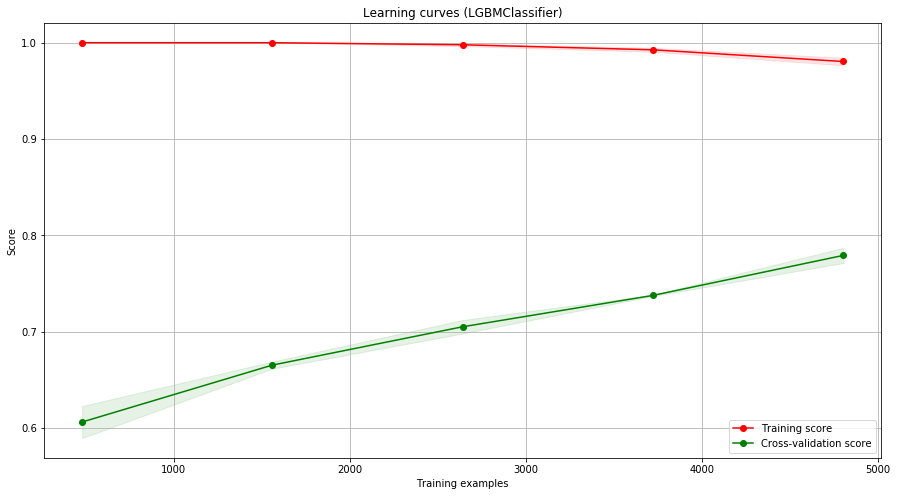

In [59]:
show_learning_curve_plot(final_model, X_train, y_train)

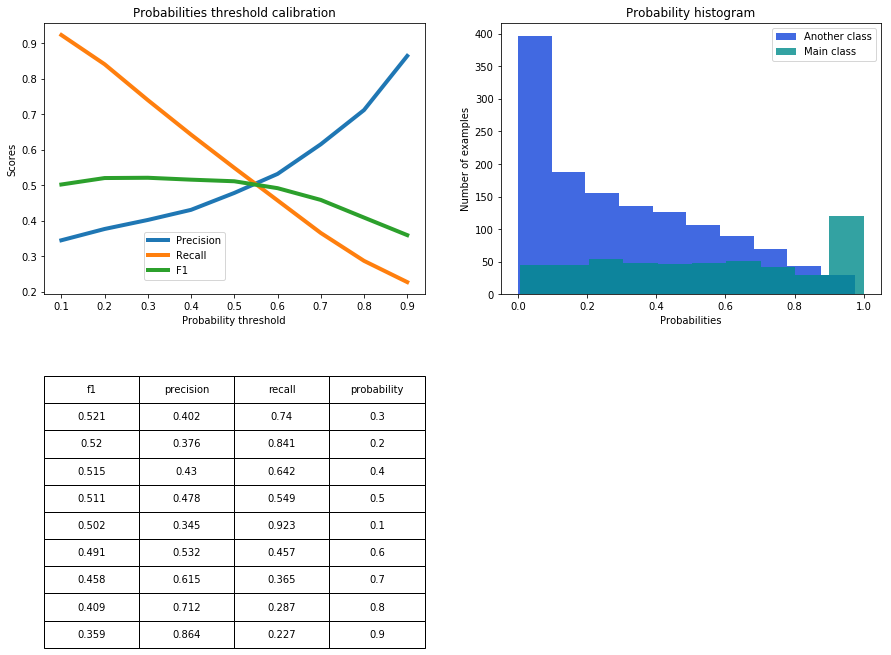

In [60]:
show_proba_calibration_plots(y_test_pred_probs[:, 1], y_test)

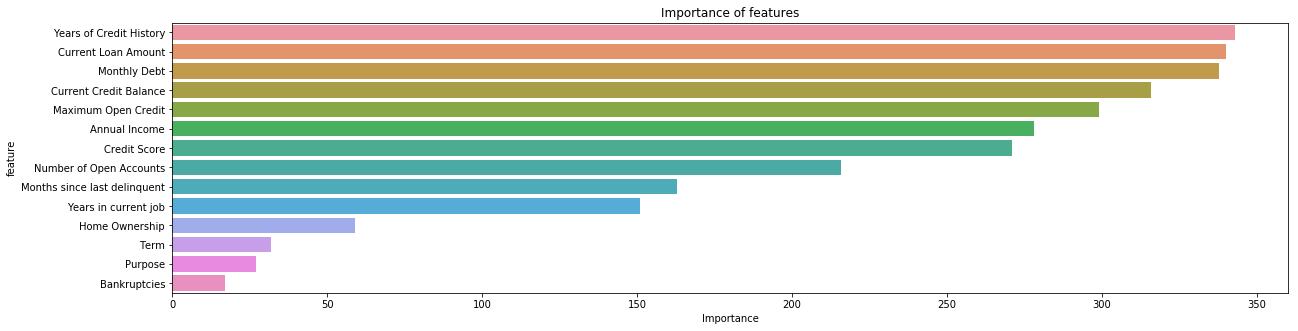

In [61]:
important_features_top = show_feature_importances(X_train.columns, final_model.feature_importances_, get_top=20)

In [62]:
important_features_top

['Years of Credit History',
 'Current Loan Amount',
 'Monthly Debt',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Annual Income',
 'Credit Score',
 'Number of Open Accounts',
 'Months since last delinquent',
 'Years in current job',
 'Home Ownership',
 'Term',
 'Purpose',
 'Bankruptcies']

# Best param XGBOOST

### model preparation

In [63]:
df.head()

,ID,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,0,-1.150,0,0,0,1.125,0.057,0,-0.696,0,0,0,-0.000,-0.731,-0.878,-0.227,0.000
1,1,0,-0.443,0,0,1,-0.426,0.787,1,-0.696,1,0,1,-0.263,0.310,0.006,-0.235,1.000
2,2,1,-0.800,1,0,0,2.351,0.788,1,-0.696,1,0,0,-0.000,0.051,-0.393,-0.232,0.000
3,3,0,-0.730,2,0,2,0.589,-0.736,0,-0.696,0,0,0,-1.100,-0.586,-0.589,-0.264,0.000
4,4,2,-0.767,1,0,3,-0.665,-0.385,0,-0.696,1,0,0,-1.074,-0.593,-0.940,-0.247,0.000


In [64]:
col_info(df)

,name,values,nancounts,type
0,ID,10000,0,int64
1,Home Ownership,4,0,category
2,Annual Income,7108,0,float64
3,Years in current job,11,0,category
4,Tax Liens,9,0,category
5,Number of Open Accounts,42,0,category
6,Years of Credit History,423,0,float64
7,Maximum Open Credit,9073,0,float64
8,Number of Credit Problems,9,0,category
9,Months since last delinquent,89,0,float64


In [65]:
df_XB = df.copy()

In [66]:
for cat_colname in df_XB.select_dtypes(include='category').columns:
            df_XB = pd.concat([df_XB, pd.get_dummies(df_XB[cat_colname], prefix=cat_colname).
                            astype('int64')],axis=1)
            df_XB = df_XB.drop(cat_colname,axis = 'columns')

In [67]:
train_XG = df_XB[:7500]
test_XG = df_XB[7500:]

In [68]:
balancedXG =  balance_df_by_target(train_XG, TARGET_NAME)

In [69]:
balanced_targetXG = balancedXG[TARGET_NAME]
balancedXG = balancedXG.drop(TARGET_NAME,axis = 'columns')

In [70]:
modelXG = xgb.XGBClassifier(random_state=21, silent=False) 

In [71]:
params = {'n_estimators': [285,290,395],
          'max_depth': [11,12,13]}

In [72]:
cv = KFold(n_splits=4, random_state=21, shuffle=True)

In [73]:
rs = RandomizedSearchCV(modelXG, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(balancedXG, balanced_targetXG)

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=21, shuffle=True),
          error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=21, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [285, 290, 395], 'max_depth': [11, 12, 13]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [74]:
rs.best_score_

0.8440780059820125

In [75]:
rs.best_params_

{'n_estimators': 285, 'max_depth': 13}

In [76]:
0.8517400260015305

0.8517400260015305

### tuning

In [77]:
X_trainXG, X_testXG, y_trainXG, y_testXG = train_test_split(balancedXG, balanced_targetXG,
                                                    shuffle=True, test_size=0.25, random_state=21)

In [78]:
# model_xgb = xgb.XGBClassifier(random_state=21, 
#                              n_estimators = 300,
#                               max_depth = 12)

In [79]:
final_modelXG = xgb.XGBClassifier(random_state=21, 
                              n_estimators = 395,
                              max_depth = 13)
final_modelXG.fit(X_trainXG, y_trainXG)

y_train_predXG = final_modelXG.predict(X_trainXG)
y_test_predXG = final_modelXG.predict(X_testXG)
y_test_pred_probsXG = final_modelXG.predict_proba(X_testXG)

get_classification_report(y_trainXG, y_train_predXG, y_testXG, y_test_predXG)

TRAIN

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4046
         1.0       1.00      1.00      1.00      3163

   micro avg       1.00      1.00      1.00      7209
   macro avg       1.00      1.00      1.00      7209
weighted avg       1.00      1.00      1.00      7209

TEST

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1341
         1.0       0.84      0.83      0.83      1063

   micro avg       0.85      0.85      0.85      2404
   macro avg       0.85      0.85      0.85      2404
weighted avg       0.85      0.85      0.85      2404

CONFUSION MATRIX

col_0           0.000  1.000
Credit Default              
0.000            1167    174
1.000             178    885


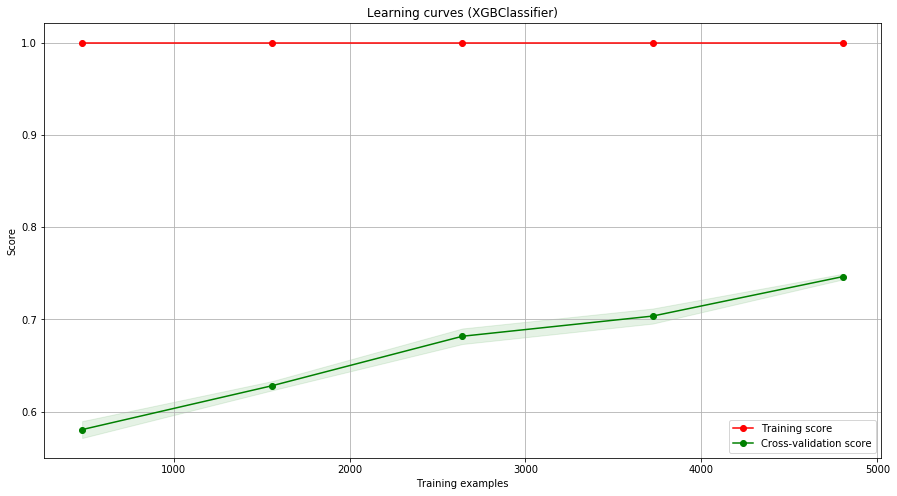

In [80]:
show_learning_curve_plot(final_modelXG, X_trainXG, y_trainXG)

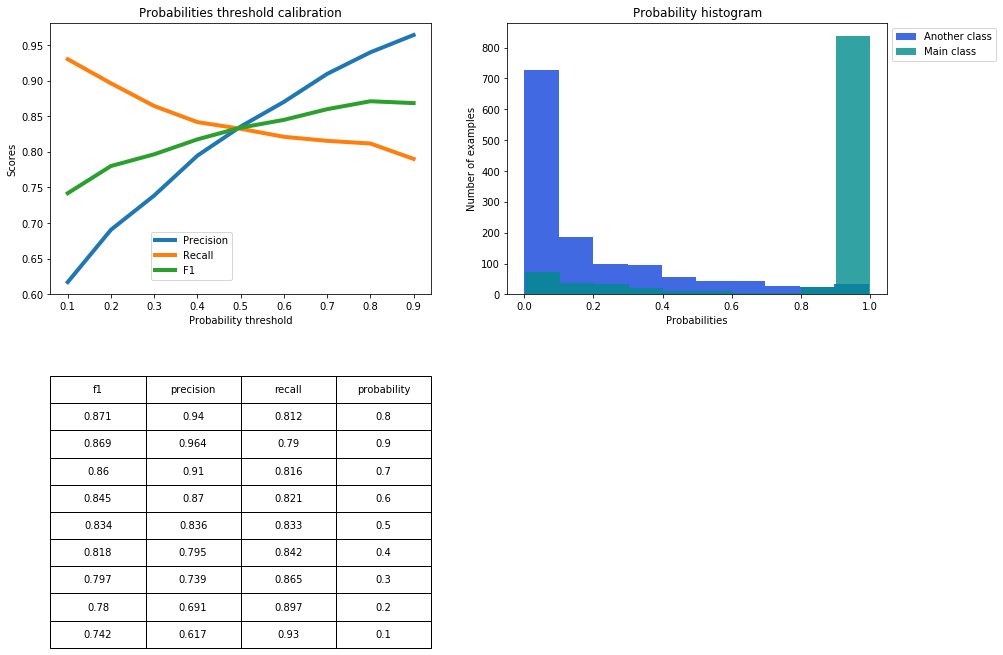

In [81]:
show_proba_calibration_plots(y_test_pred_probsXG[:, 1], y_testXG)

# Final predict

In [82]:
final_modelXGBoost = xgb.XGBClassifier(random_state=21, 
                              n_estimators = 395,
                              max_depth = 13)

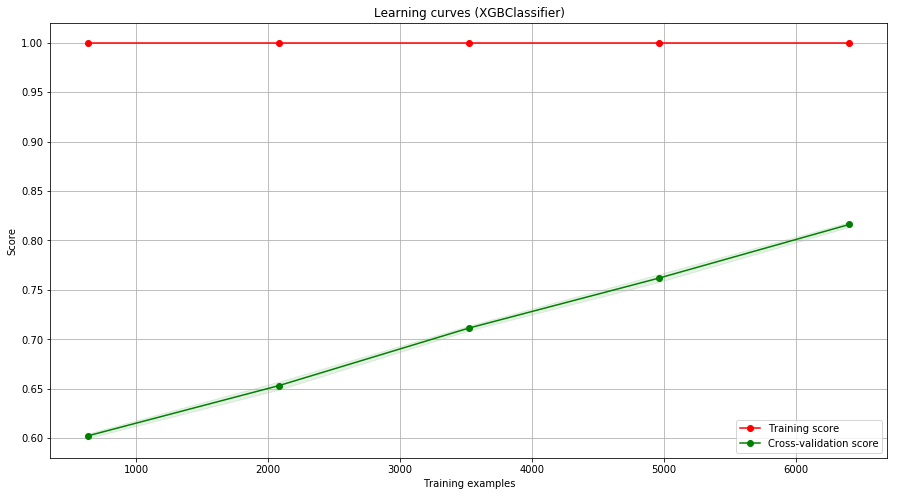

In [83]:
show_learning_curve_plot(final_modelXGBoost, balancedXG, balanced_targetXG)

In [84]:
final_modelXGBoost.fit(balancedXG, balanced_targetXG)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=13, min_child_weight=1, missing=None, n_estimators=395,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=21, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [85]:
test[TARGET_NAME]  = final_modelXGBoost.predict(test_XG.drop(TARGET_NAME,axis = 'columns'))

In [86]:
test[TARGET_NAME].value_counts()

0.000    2054
1.000     446
Name: Credit Default, dtype: int64

In [87]:
test[TARGET_NAME].to_csv("SCuznetov_predictions.csv")